# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML/monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')

In [4]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
count,2016.000000,2016.00000,1848.000000,1848.000000,1840.000000,1763.000000,1848.000000
mean,2011.500000,201156.50000,776.984848,776.984848,5.241538,1.897357,777.310065
std,6.923904,692.39901,1176.030443,1176.030443,40.926314,31.287810,1164.856446
min,2000.000000,200001.00000,0.000000,0.000000,-100.000000,-100.000000,12.000000
25%,2005.750000,200578.75000,38.000000,38.000000,-15.540000,-13.380000,40.000000
50%,2011.500000,201156.50000,358.500000,358.500000,0.000000,-1.130000,421.000000
75%,2017.250000,201734.25000,811.000000,811.000000,18.712500,11.485000,814.250000
max,2023.000000,202312.00000,4763.000000,4763.000000,600.000000,425.000000,3977.000000


In [6]:
df.isna().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                              168
VORJAHRESWERT                     168
VERAEND_VORMONAT_PROZENT          176
VERAEND_VORJAHRESMONAT_PROZENT    253
ZWOELF_MONATE_MITTELWERT          168
dtype: int64

In [7]:
#Imortamt columns have no missing values

In [8]:

pd.set_option('display.max_rows', None)

In [9]:
duplicates = df.duplicated(subset=['MONATSZAHL', 'AUSPRAEGUNG', 'MONAT'])

In [10]:
duplicates.sum()

0

In [11]:
df['MONAT'] = pd.to_datetime(df['MONAT'].astype(str), format='%Y%m')

In [12]:
df.set_index(df['MONAT'], inplace=True)

In [13]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
MONAT,,,,,,,,,
2023-01-01,Alkoholunfälle,insgesamt,2023,2023-01-01,NaN,NaN,NaN,NaN,NaN
2023-02-01,Alkoholunfälle,insgesamt,2023,2023-02-01,NaN,NaN,NaN,NaN,NaN
2023-03-01,Alkoholunfälle,insgesamt,2023,2023-03-01,NaN,NaN,NaN,NaN,NaN
2023-04-01,Alkoholunfälle,insgesamt,2023,2023-04-01,NaN,NaN,NaN,NaN,NaN
2023-05-01,Alkoholunfälle,insgesamt,2023,2023-05-01,NaN,NaN,NaN,NaN,NaN


In [14]:
df.drop('MONAT', axis=1, inplace=True)

In [15]:
pivot_Wert = df[df['JAHR']<=2020].pivot_table(index='MONAT', columns=['MONATSZAHL', 'AUSPRAEGUNG'], values='WERT')

In [16]:
pivot_Wert.columns = ['_'.join(col).strip() for col in pivot_Wert.columns.values]

In [17]:
pivot_Wert.columns

Index(['Alkoholunfälle_Verletzte und Getötete', 'Alkoholunfälle_insgesamt',
       'Fluchtunfälle_Verletzte und Getötete', 'Fluchtunfälle_insgesamt',
       'Verkehrsunfälle_Verletzte und Getötete', 'Verkehrsunfälle_insgesamt',
       'Verkehrsunfälle_mit Personenschäden'],
      dtype='object')

#Data Visualisation

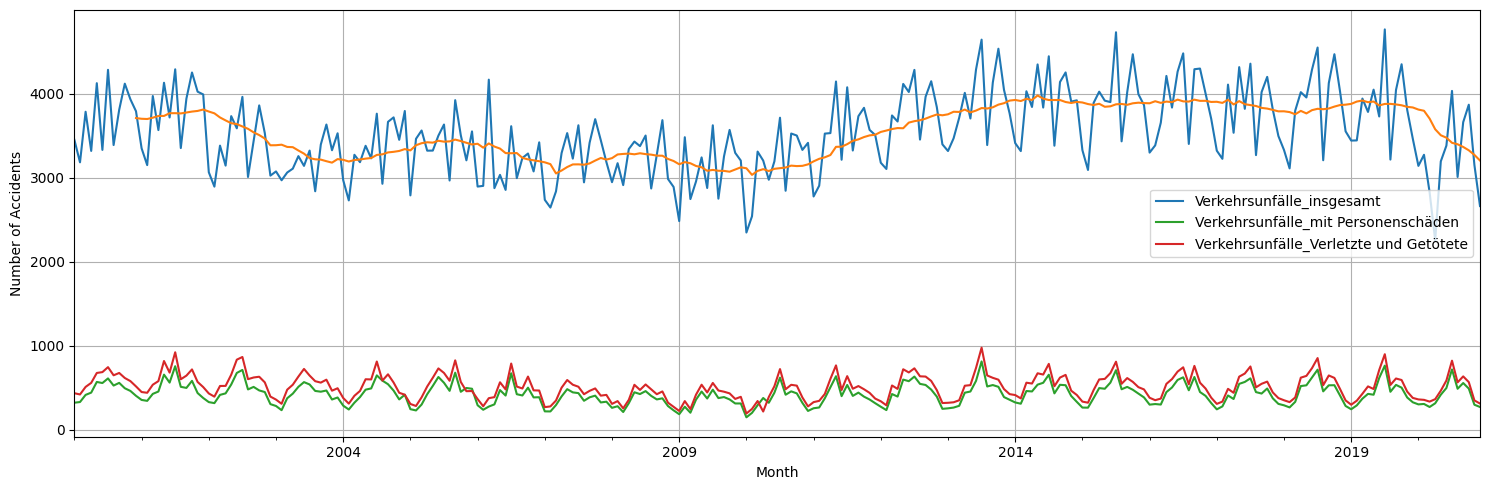

In [18]:
pivot_Wert['Verkehrsunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_insgesamt'].rolling(window=12).mean().plot(figsize=(15, 5), legend=False)
pivot_Wert['Verkehrsunfälle_mit Personenschäden'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

In [19]:
#Number of total accidents fluctuates between 3000 and 4000 (the rolling mean) accidents per month with a tendency to fall after the pandemic started.

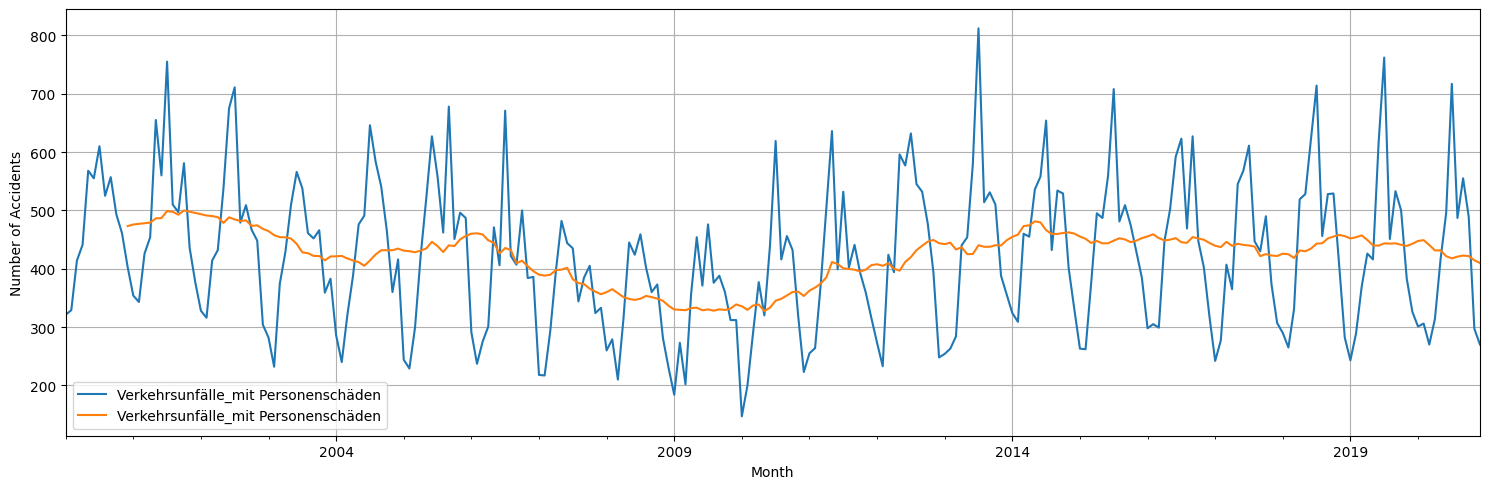

In [20]:
pivot_Wert['Verkehrsunfälle_mit Personenschäden'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_mit Personenschäden'].rolling(window=12).mean().plot(figsize=(15, 5), legend=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

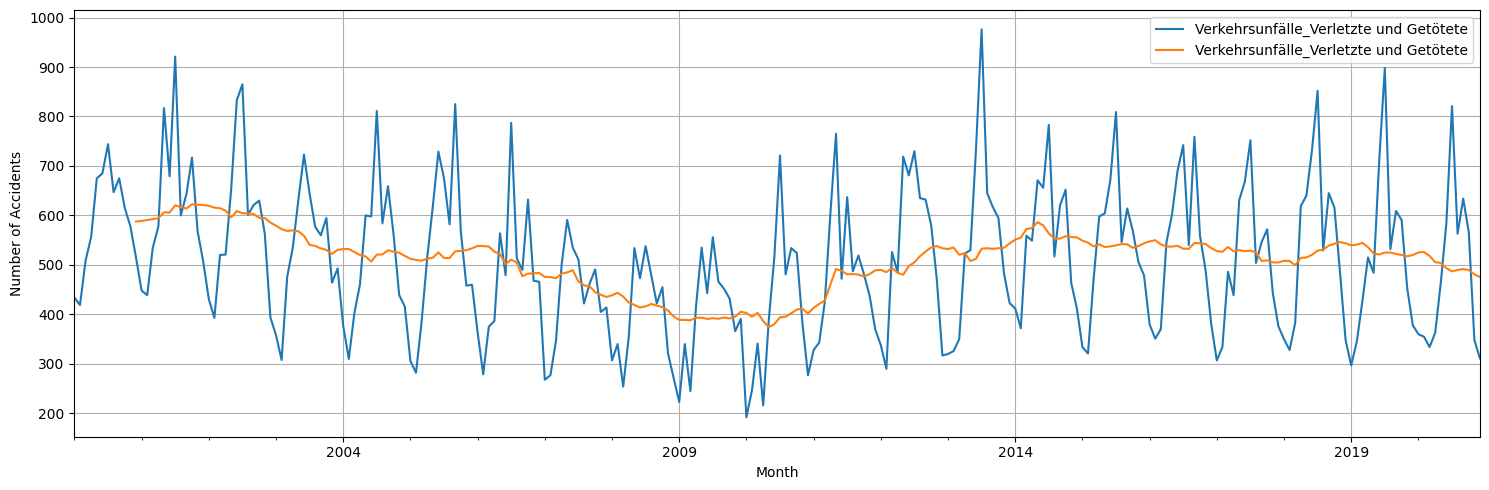

In [21]:
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot(figsize=(15, 5), legend=True)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

In [22]:
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].corr(pivot_Wert['Verkehrsunfälle_mit Personenschäden'])

0.9823936533948995

In [23]:
#I might be able to drop one  of both since they do not contain any new information

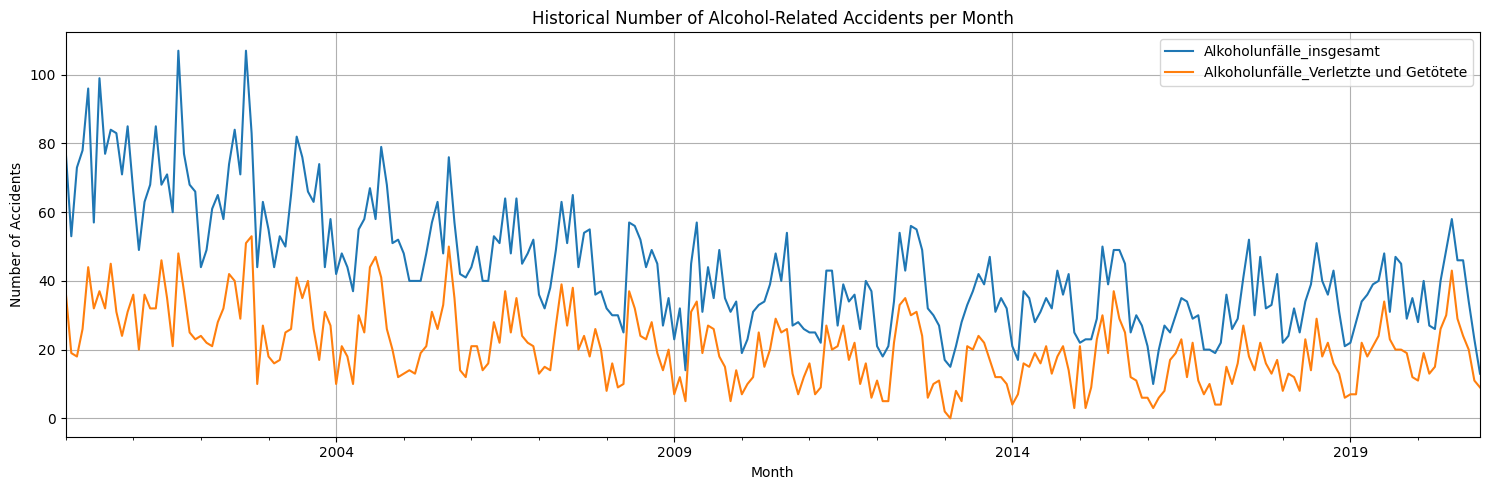

In [24]:
pivot_Wert['Alkoholunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)
plt.title('Historical Number of Alcohol-Related Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()

<Axes: xlabel='MONAT'>

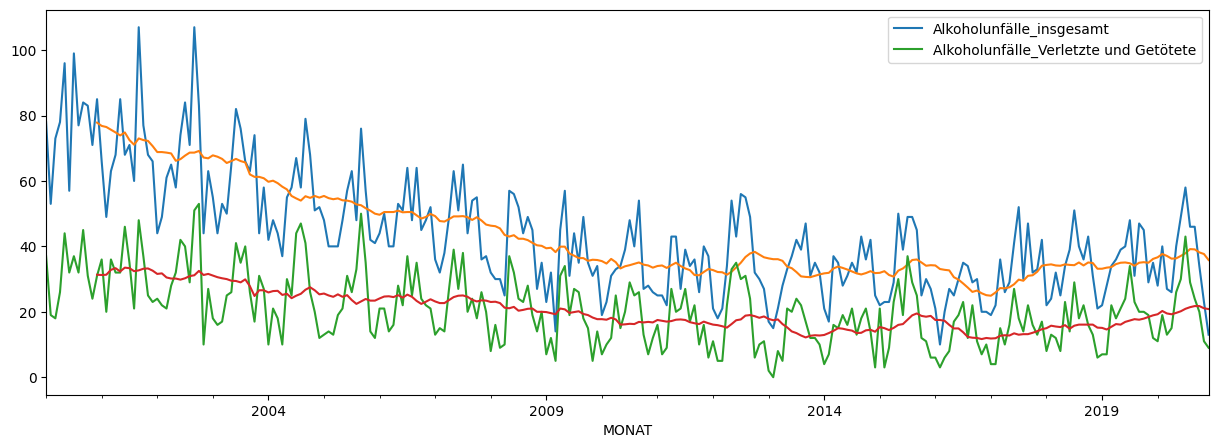

In [25]:
pivot_Wert['Alkoholunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Alkoholunfälle_insgesamt'].rolling(window=12).mean().plot( legend=False)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].plot( legend=True)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot( legend=False)

<Axes: xlabel='MONAT'>

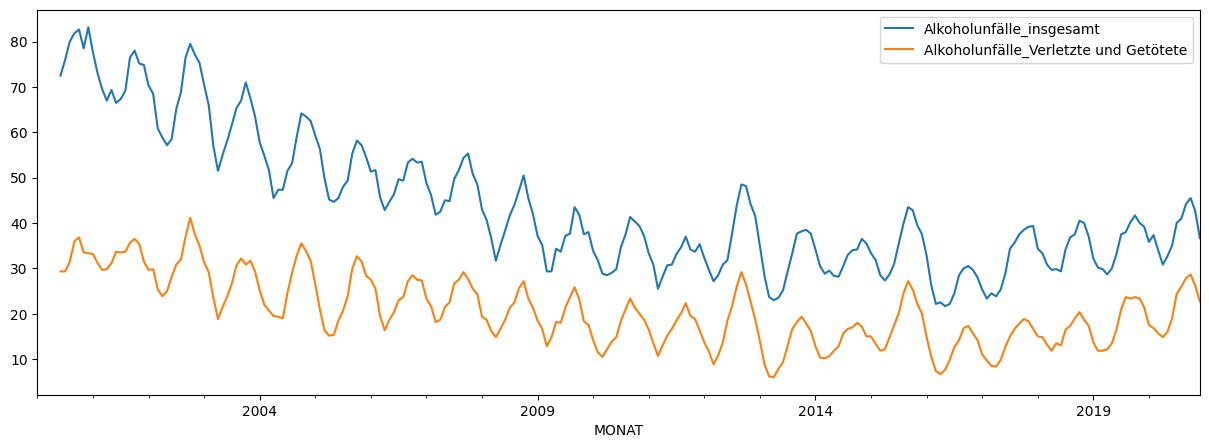

In [26]:
pivot_Wert['Alkoholunfälle_insgesamt'].rolling(window=6).mean().plot(figsize=(15, 5), legend=True)
pivot_Wert['Alkoholunfälle_Verletzte und Getötete'].rolling(window=6).mean().plot(figsize=(15, 5), legend=True)

<Axes: xlabel='MONAT'>

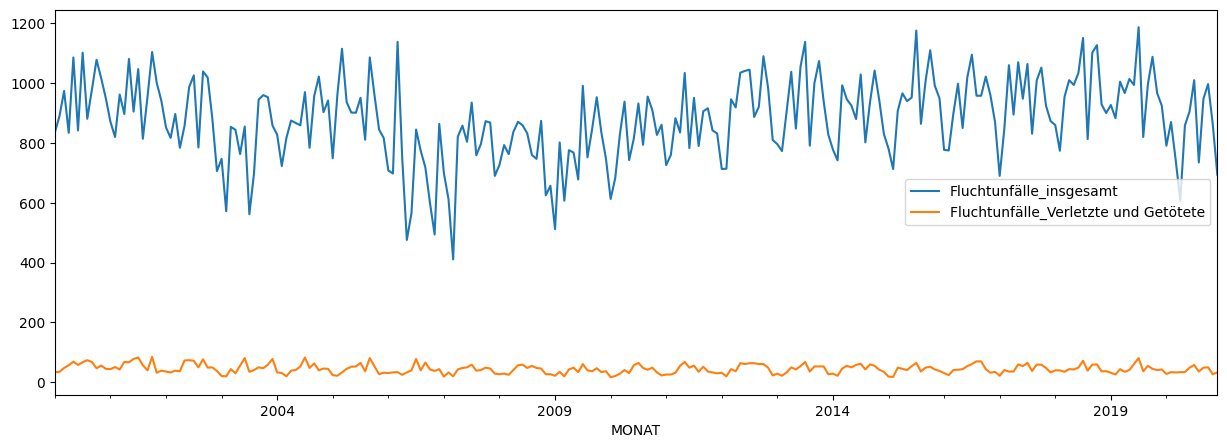

In [27]:
pivot_Wert['Fluchtunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Fluchtunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)

<Axes: xlabel='MONAT'>

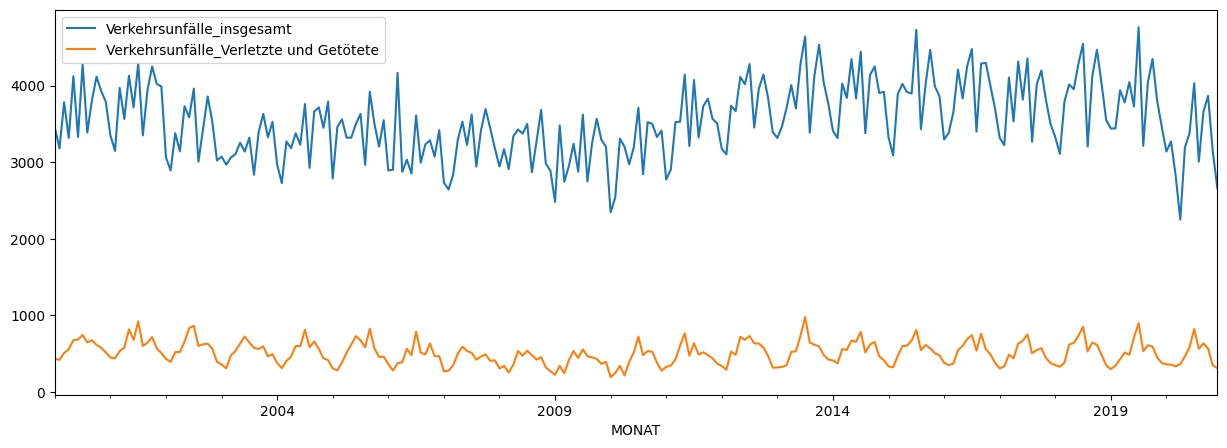

In [28]:
pivot_Wert['Verkehrsunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_Wert['Verkehrsunfälle_Verletzte und Getötete'].plot(figsize=(15, 5), legend=True)

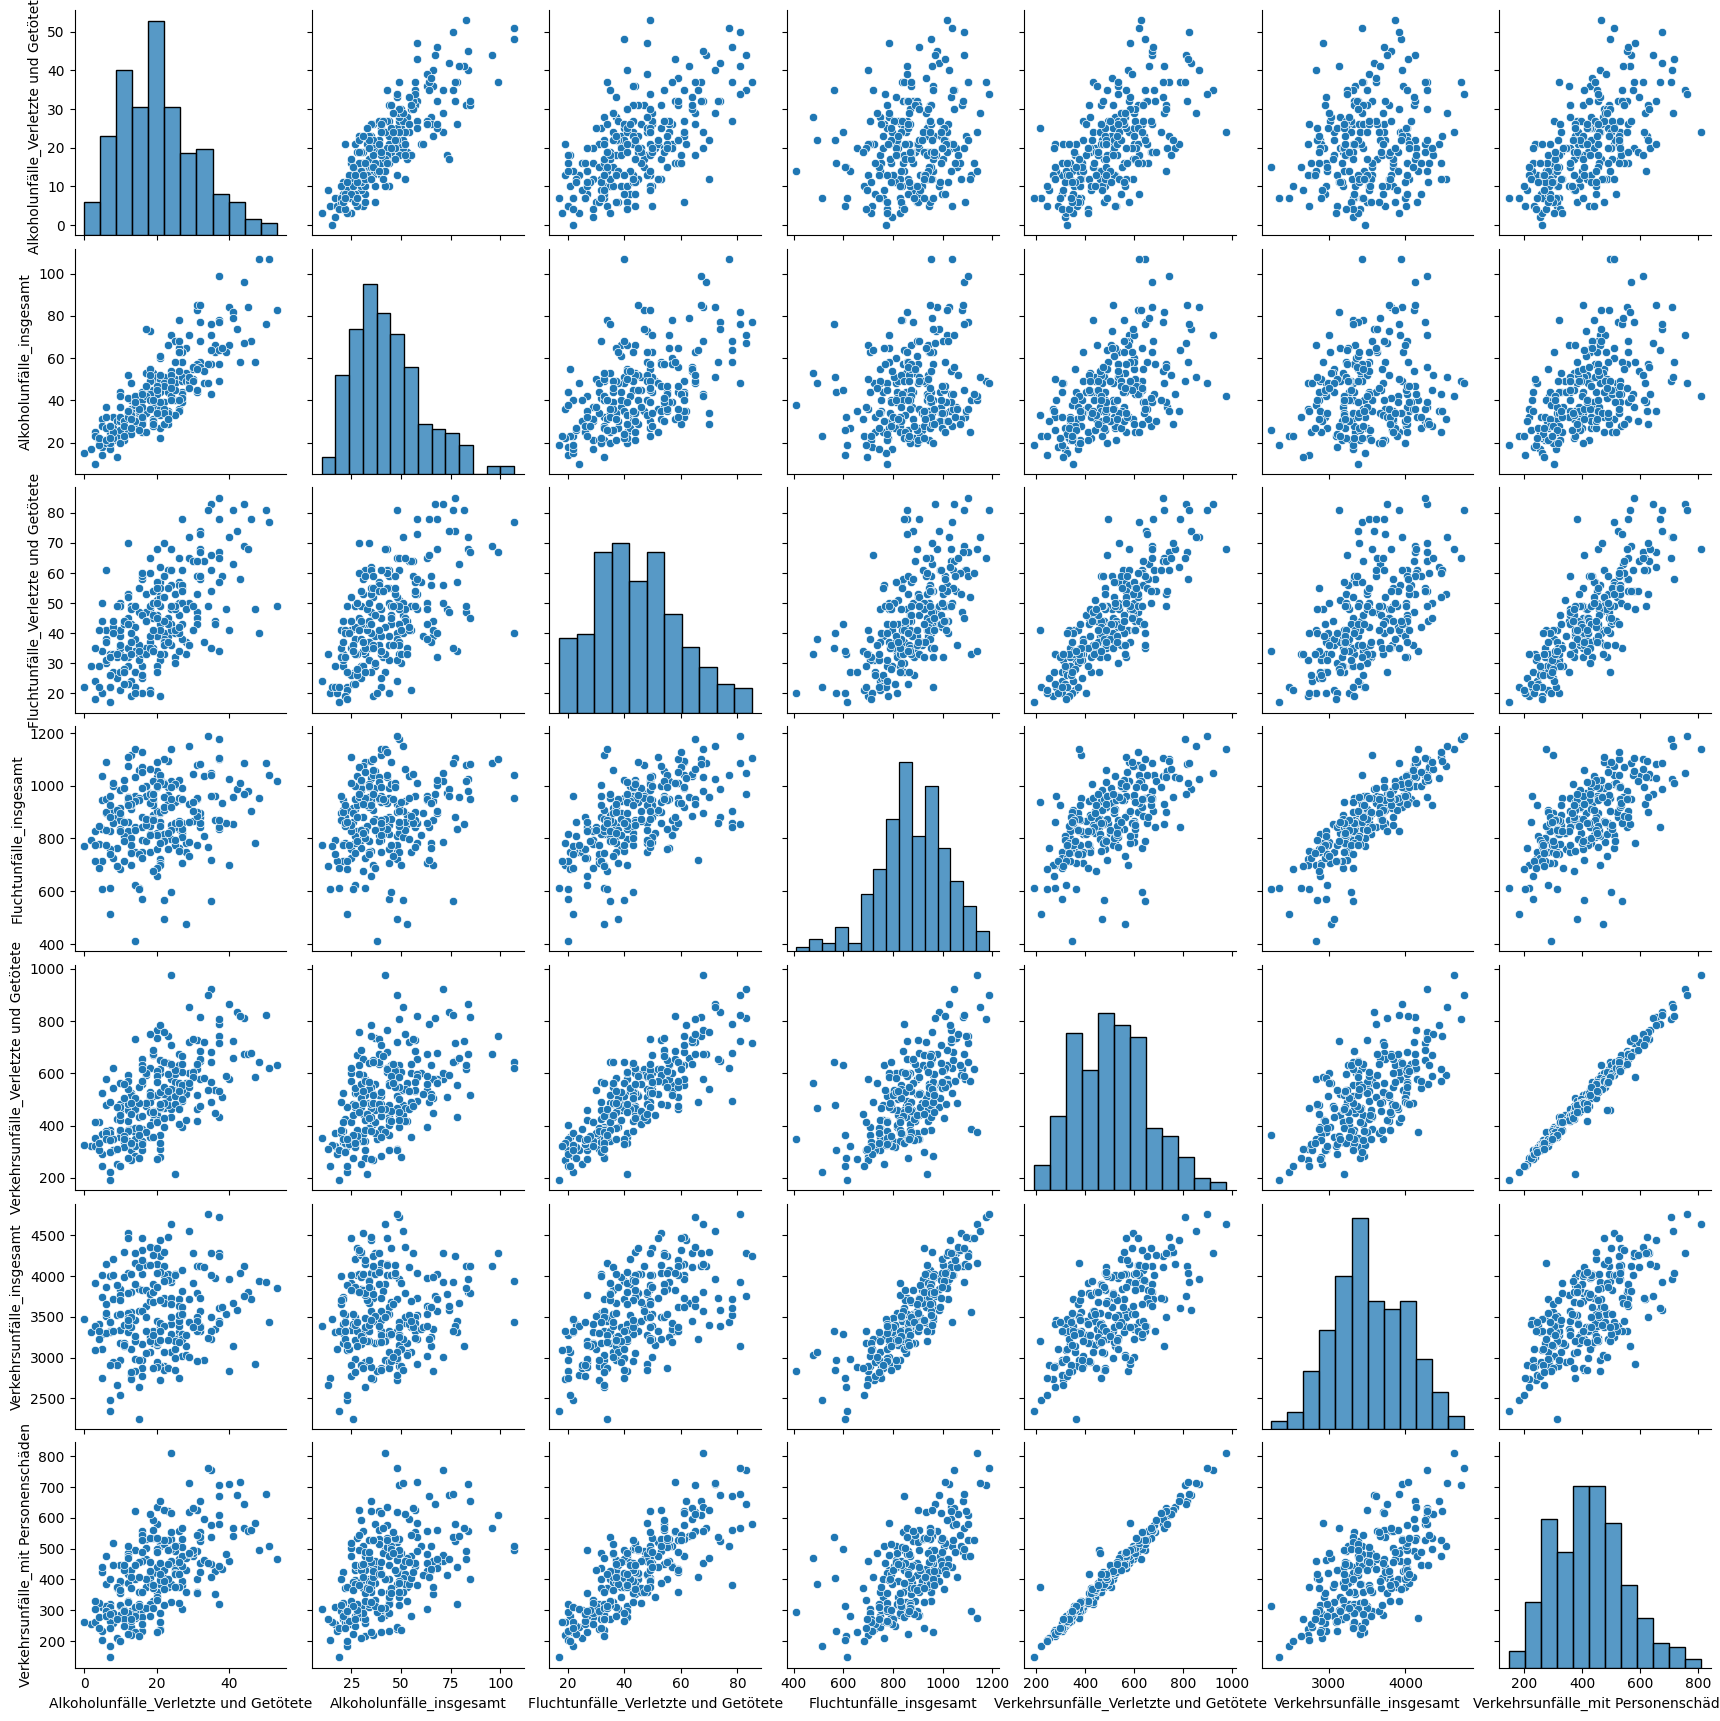

In [29]:
sns.pairplot(pivot_Wert, diag_kind='hist')

In [30]:
pivot_Wert.corr()

,Alkoholunfälle_Verletzte und Getötete,Alkoholunfälle_insgesamt,Fluchtunfälle_Verletzte und Getötete,Fluchtunfälle_insgesamt,Verkehrsunfälle_Verletzte und Getötete,Verkehrsunfälle_insgesamt,Verkehrsunfälle_mit Personenschäden
Alkoholunfälle_Verletzte und Getötete,1.000000,0.827854,0.615693,0.226250,0.623204,0.148816,0.605607
Alkoholunfälle_insgesamt,0.827854,1.000000,0.535236,0.231376,0.529470,0.141663,0.487756
Fluchtunfälle_Verletzte und Getötete,0.615693,0.535236,1.000000,0.592448,0.825541,0.557021,0.818332
Fluchtunfälle_insgesamt,0.226250,0.231376,0.592448,1.000000,0.605159,0.861219,0.604825
Verkehrsunfälle_Verletzte und Getötete,0.623204,0.529470,0.825541,0.605159,1.000000,0.661860,0.982394
Verkehrsunfälle_insgesamt,0.148816,0.141663,0.557021,0.861219,0.661860,1.000000,0.657163
Verkehrsunfälle_mit Personenschäden,0.605607,0.487756,0.818332,0.604825,0.982394,0.657163,1.000000


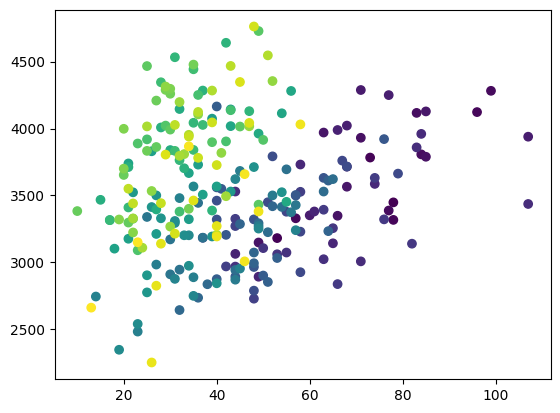

In [31]:
plt.scatter(pivot_Wert['Alkoholunfälle_insgesamt'], pivot_Wert['Verkehrsunfälle_insgesamt'], c=pivot_Wert.index, cmap='viridis')

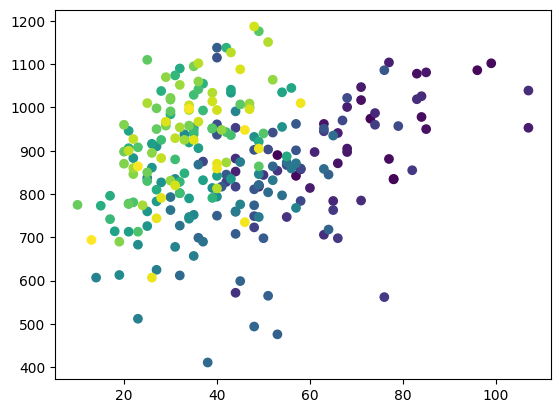

In [32]:
plt.scatter(pivot_Wert['Alkoholunfälle_insgesamt'], pivot_Wert['Fluchtunfälle_insgesamt'], c=pivot_Wert.index, cmap='viridis')

In [33]:
pivot_Wert['Alkoholunfälle_insgesamt'].corr(pivot_Wert['Verkehrsunfälle_insgesamt'])

0.14166256413921613

In [34]:
pivot_Wert['Alkoholunfälle_insgesamt'].corr(pivot_Wert['Fluchtunfälle_insgesamt'])

0.23137583925729793

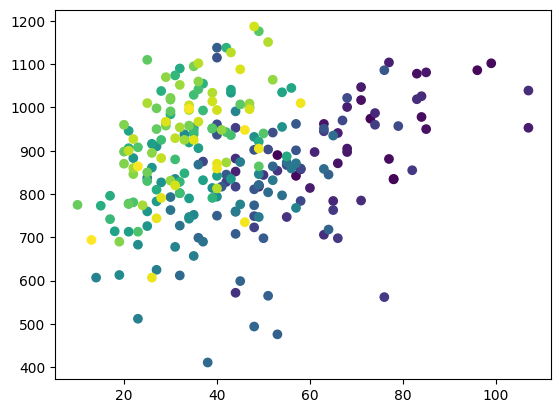

In [35]:
plt.scatter(pivot_Wert['Alkoholunfälle_insgesamt'], pivot_Wert['Fluchtunfälle_insgesamt'], c=pivot_Wert.index, cmap='viridis')

In [36]:
pivot_Wert['Fluchtunfälle_insgesamt'].corr(pivot_Wert['Verkehrsunfälle_insgesamt'])

0.8612186308861737

In [37]:
pivot_Wert.groupby(pivot_Wert.index.year).sum()[['Alkoholunfälle_insgesamt', 'Verkehrsunfälle_Verletzte und Getötete', 'Fluchtunfälle_Verletzte und Getötete']]

,Alkoholunfälle_insgesamt,Verkehrsunfälle_Verletzte und Getötete,Fluchtunfälle_Verletzte und Getötete
MONAT,,,
2000,934.0,7053.0,658.0
2001,848.0,7452.0,687.0
2002,803.0,7026.0,628.0
2003,730.0,6365.0,562.0
2004,659.0,6219.0,542.0
2005,600.0,6402.0,525.0
2006,599.0,5804.0,505.0
2007,560.0,5223.0,476.0
2008,482.0,4751.0,489.0


In [38]:
pivot_pct = pd.DataFrame()

In [39]:
pivot_pct.index= pivot_Wert.index

In [40]:
pivot_Wert.columns

Index(['Alkoholunfälle_Verletzte und Getötete', 'Alkoholunfälle_insgesamt',
       'Fluchtunfälle_Verletzte und Getötete', 'Fluchtunfälle_insgesamt',
       'Verkehrsunfälle_Verletzte und Getötete', 'Verkehrsunfälle_insgesamt',
       'Verkehrsunfälle_mit Personenschäden'],
      dtype='object')

In [41]:
pivot_pct['Alkoholunfälle_Verletzte und Getötete'] = np.round(pivot_Wert['Alkoholunfälle_Verletzte und Getötete']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'],2)

In [42]:
pivot_pct['Alkoholunfälle_insgesamt'] = np.round(pivot_Wert['Alkoholunfälle_insgesamt']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'], 2)

Text(0.5, 1.0, 'Total number of alcohol related accidents in relation to total number accidents')

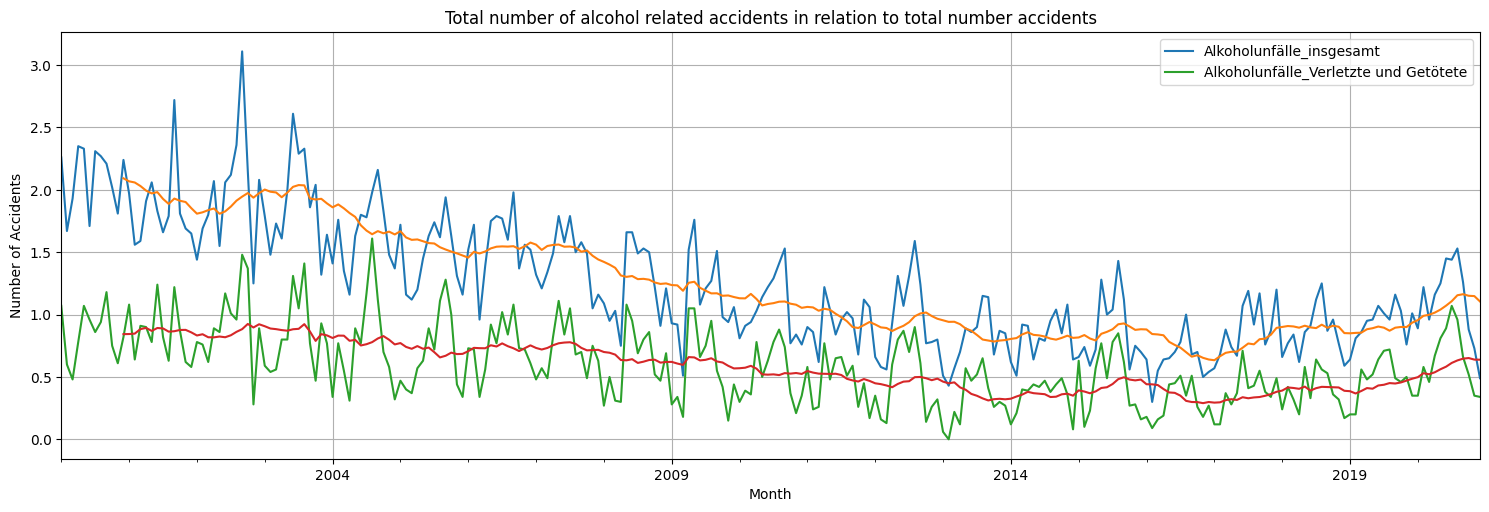

In [43]:
pivot_pct['Alkoholunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_pct['Alkoholunfälle_insgesamt'].rolling(window=12).mean().plot( legend=False)
pivot_pct['Alkoholunfälle_Verletzte und Getötete'].plot( legend=True)
pivot_pct['Alkoholunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot( legend=False)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.title('Total number of alcohol related accidents in relation to total number accidents')

In [44]:
pivot_pct['Fluchtunfälle_Verletzte und Getötete'] = np.round(pivot_Wert['Fluchtunfälle_Verletzte und Getötete']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'],2)

In [45]:
pivot_pct['Fluchtunfälle_insgesamt'] = np.round(pivot_Wert['Fluchtunfälle_insgesamt']*100 / pivot_Wert['Verkehrsunfälle_insgesamt'], 2)

Text(0.5, 1.0, '')

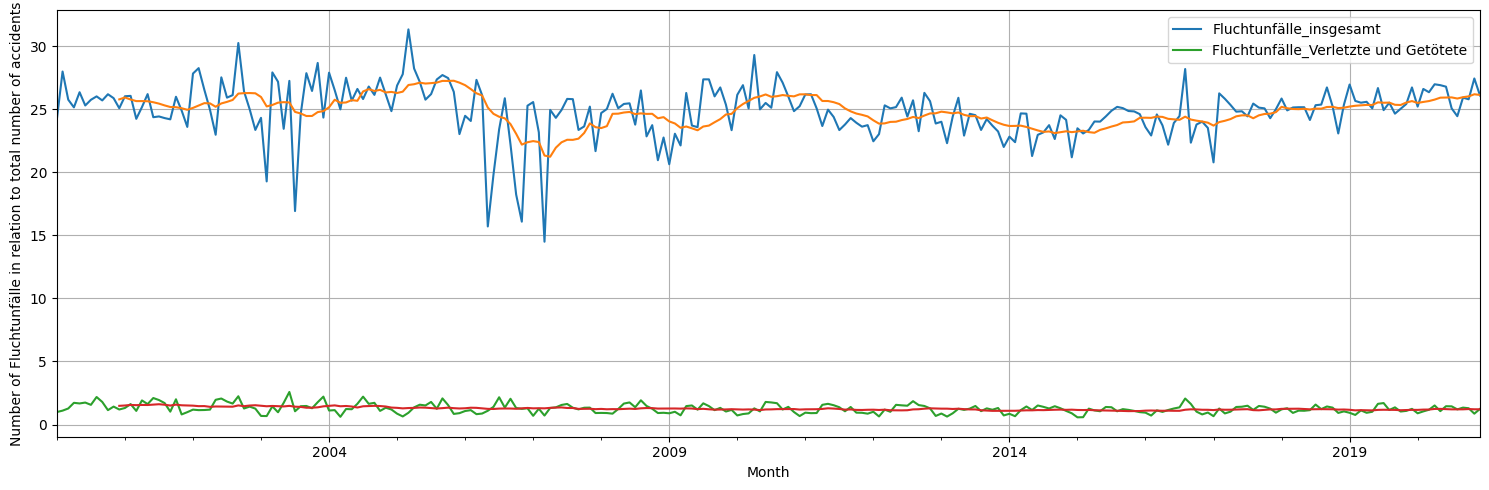

In [46]:
pivot_pct['Fluchtunfälle_insgesamt'].plot(figsize=(15, 5), legend=True)
pivot_pct['Fluchtunfälle_insgesamt'].rolling(window=12).mean().plot( legend=False)
pivot_pct['Fluchtunfälle_Verletzte und Getötete'].plot( legend=True)
pivot_pct['Fluchtunfälle_Verletzte und Getötete'].rolling(window=12).mean().plot( legend=False)
plt.xlabel('Month')
plt.ylabel('Number of Fluchtunfälle in relation to total number of accidents')
plt.grid(True)
plt.tight_layout()
plt.title('')

In [47]:
pivot_Wert.describe()

,Alkoholunfälle_Verletzte und Getötete,Alkoholunfälle_insgesamt,Fluchtunfälle_Verletzte und Getötete,Fluchtunfälle_insgesamt,Verkehrsunfälle_Verletzte und Getötete,Verkehrsunfälle_insgesamt,Verkehrsunfälle_mit Personenschäden
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,20.698413,43.753968,44.888889,879.428571,511.531746,3537.198413,424.547619
std,10.671308,18.069448,14.993078,135.216334,148.671149,479.649632,125.317357
min,0.000000,10.000000,17.000000,411.000000,192.000000,2251.000000,147.000000
25%,12.750000,30.750000,34.000000,793.750000,390.500000,3205.750000,320.750000
50%,20.000000,40.000000,43.000000,877.500000,508.000000,3487.000000,423.000000
75%,27.000000,53.250000,55.000000,966.250000,610.250000,3906.750000,506.000000
max,53.000000,107.000000,85.000000,1187.000000,976.000000,4763.000000,812.000000


<Axes: >

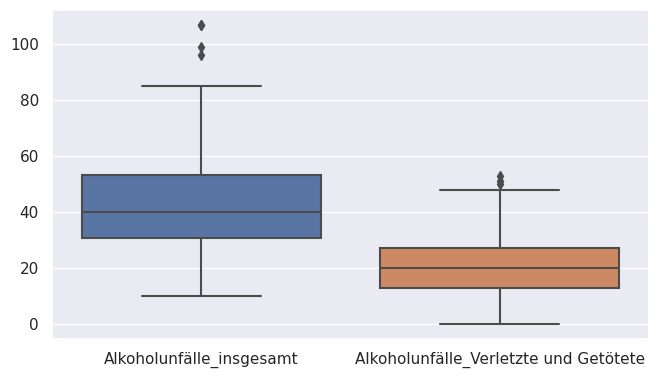

In [48]:
sns.set(rc={'figure.figsize':(7.7,4.27)})
sns.boxplot(data=pivot_Wert[['Alkoholunfälle_insgesamt', 'Alkoholunfälle_Verletzte und Getötete']])


In [49]:
pivot_Wert[['Alkoholunfälle_insgesamt', 'Alkoholunfälle_Verletzte und Getötete']].skew()

Alkoholunfälle_insgesamt                 0.878446
Alkoholunfälle_Verletzte und Getötete    0.565813
dtype: float64

In [50]:
pivot_Wert['Alkoholunfälle_insgesamt_log'] = np.log1p(pivot_Wert['Alkoholunfälle_insgesamt'])

In [51]:
pivot_Wert['Alkoholunfälle_insgesamt_log'].skew()

-0.16757555309036612

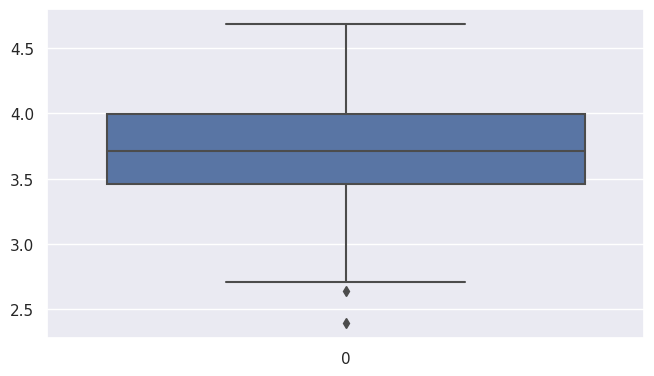

In [52]:
sns.boxplot(data=pivot_Wert['Alkoholunfälle_insgesamt_log'])
sns.set(rc={'figure.figsize':(1.7,2.27)})

In [53]:
#The distribution had a moderate right skew, after transformation skewness is close to 0. Data is now more symmetric, close to a normal distribution.

In [54]:
pivot_Wert['Alkoholunfälle_Verletzte und Getötete_log'] = np.log1p(pivot_Wert['Alkoholunfälle_Verletzte und Getötete'])

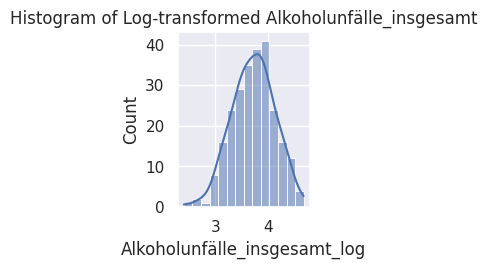

In [55]:
sns.histplot(pivot_Wert['Alkoholunfälle_insgesamt_log'], kde=True).set(title='Histogram of Log-transformed Alkoholunfälle_insgesamt')
sns.set(rc={'figure.figsize':(5.7,8.27)})

In [56]:
def percentage_change(values):
  previous_values = values[:-1]
  last_value= values[-1]

  percent_change = (last_value - np.mean(previous_values))*100/np.mean(previous_values)
  return percent_change

In [57]:
pivot_pct['Alkoholunfälle_deviation_from_mean']= pivot_Wert['Alkoholunfälle_insgesamt'].rolling(window=20).aggregate(percentage_change)

Text(0.5, 1.0, '% change over time ')

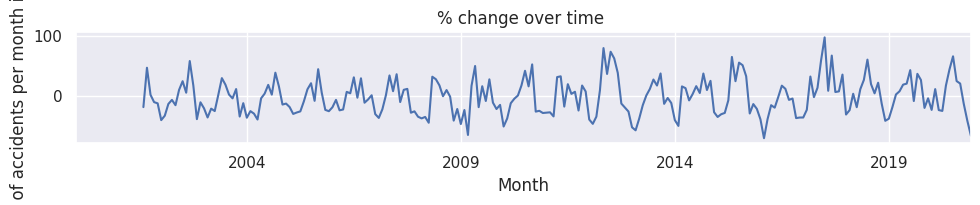

In [58]:
pivot_pct['Alkoholunfälle_deviation_from_mean'].plot(figsize=(10,2))
plt.xlabel('Month')
plt.ylabel('Percentage change of total number of accidents per month in relation to mean (20 month window)')
plt.grid(True)
plt.tight_layout()
plt.title('% change over time ')

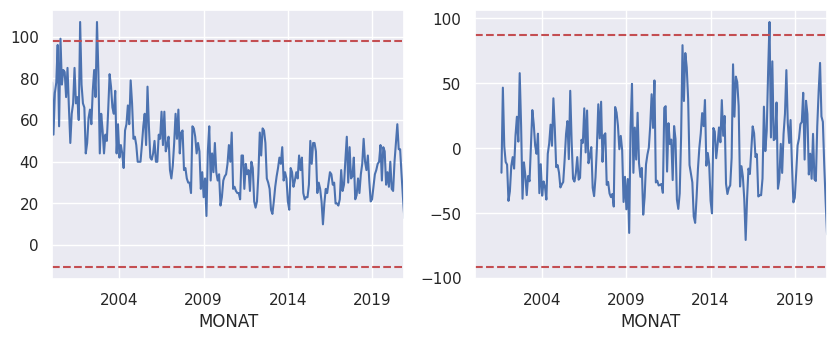

In [59]:
fix, axs= plt.subplots(1,2, figsize=(10,3.5))
for data, ax in zip([pivot_Wert['Alkoholunfälle_insgesamt'],pivot_pct['Alkoholunfälle_deviation_from_mean']], axs):
  this_mean= data.mean()
  this_std= data.std()

  data.plot(ax=ax)
  ax.axhline(this_mean + this_std *3, ls='--', c='r')
  ax.axhline(this_mean - this_std *3, ls='--', c='r')

#Preprocessing

In [60]:
df_train = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt') & (df['JAHR'] <= 2020)]

In [61]:
df_test = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt') & (df['JAHR'] == 2021)]

In [62]:
df_train.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
MONAT,,,,,,,,
2020-01-01,Alkoholunfälle,insgesamt,2020,28.0,22.0,-20.00,27.27,37.0
2020-02-01,Alkoholunfälle,insgesamt,2020,40.0,28.0,42.86,42.86,38.0
2020-03-01,Alkoholunfälle,insgesamt,2020,27.0,34.0,-32.50,-20.59,37.0
2020-04-01,Alkoholunfälle,insgesamt,2020,26.0,36.0,-3.70,-27.78,36.0
2020-05-01,Alkoholunfälle,insgesamt,2020,40.0,39.0,53.85,2.56,36.0


In [63]:
df_train.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

In [64]:
df_train = df_train.drop(['MONATSZAHL', 'AUSPRAEGUNG','JAHR', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'], axis=1)

In [65]:
df_test = df_test.drop(['MONATSZAHL', 'AUSPRAEGUNG','JAHR', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'], axis=1)

In [66]:
df_train.head()

,WERT
MONAT,
2020-01-01,28.0
2020-02-01,40.0
2020-03-01,27.0
2020-04-01,26.0
2020-05-01,40.0


In [67]:
df_train.sort_index(inplace=True)

In [68]:
df_test.sort_index(inplace=True)

In [69]:
df_train['YEAR'] = df_train.index.year

In [70]:
df_train['MONTH'] = df_train.index.month

In [71]:
df_train['Quarter'] = df_train.index.quarter

In [72]:
df_test['YEAR'] = df_test.index.year

In [73]:
df_test['MONTH'] = df_test.index.month

In [74]:
df_test['Quarter'] = df_test.index.quarter

In [75]:
df_train.head()

,WERT,YEAR,MONTH,Quarter
MONAT,,,,
2000-01-01,78.0,2000,1,1
2000-02-01,53.0,2000,2,1
2000-03-01,73.0,2000,3,1
2000-04-01,78.0,2000,4,2
2000-05-01,96.0,2000,5,2


In [76]:
df_test.head()

,WERT,YEAR,MONTH,Quarter
MONAT,,,,
2021-01-01,16.0,2021,1,1
2021-02-01,14.0,2021,2,1
2021-03-01,24.0,2021,3,1
2021-04-01,16.0,2021,4,2
2021-05-01,24.0,2021,5,2


In [77]:
y = df_train[['WERT']].values

In [78]:
X= df_train[['YEAR', 'MONTH', 'Quarter']].values

In [79]:
len(y)

252

In [80]:
len(X)

252

#Model Creation and Evaluation

In [81]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

In [82]:
log_transformer = FunctionTransformer(np.log1p, validate=True)

In [83]:
tscv= TimeSeriesSplit(n_splits=20)

In [84]:
ridge= Ridge(alpha=5)

In [85]:
y = log_transformer.fit_transform(y)

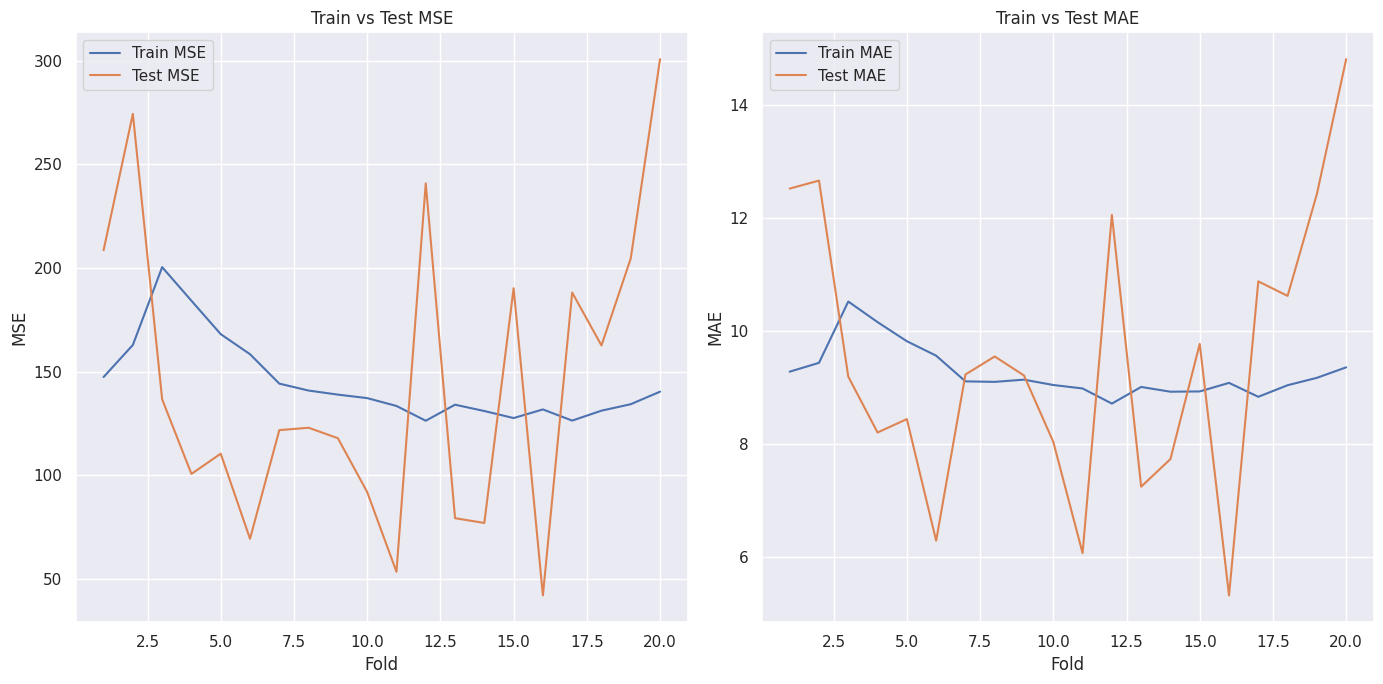

In [86]:
train_mse_scores = []
test_mse_scores = []
train_mae_scores = []
test_mae_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ridge.fit(X_train, y_train)

    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    y_train_pred_org = np.expm1(y_train_pred)
    y_test_pred_org = np.expm1(y_test_pred)
    y_train_org = np.expm1(y_train)
    y_test_org = np.expm1(y_test)

    train_mse = mean_squared_error(y_train_org, y_train_pred_org)
    test_mse = mean_squared_error(y_test_org, y_test_pred_org)
    train_mae = mean_absolute_error(y_train_org, y_train_pred_org)
    test_mae = mean_absolute_error(y_test_org, y_test_pred_org)

    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)
    train_mae_scores.append(train_mae)
    test_mae_scores.append(test_mae)


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_mse_scores) + 1), train_mse_scores, label='Train MSE')
plt.plot(range(1, len(test_mse_scores) + 1), test_mse_scores, label='Test MSE')
plt.title('Train vs Test MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_mae_scores) + 1), train_mae_scores, label='Train MAE')
plt.plot(range(1, len(test_mae_scores) + 1), test_mae_scores, label='Test MAE')
plt.title('Train vs Test MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [87]:
np.mean(test_mse_scores)

144.68810349088864

In [88]:
np.mean(test_mae_scores)

9.513420217542235

In [89]:
ridge.coef_

array([[-0.04784347,  0.01711861,  0.03583892]])

In [90]:
y_org = np.expm1(y)

In [91]:
y_pred= ridge.predict(X)

In [92]:
y_pred_org= np.expm1(y_pred)

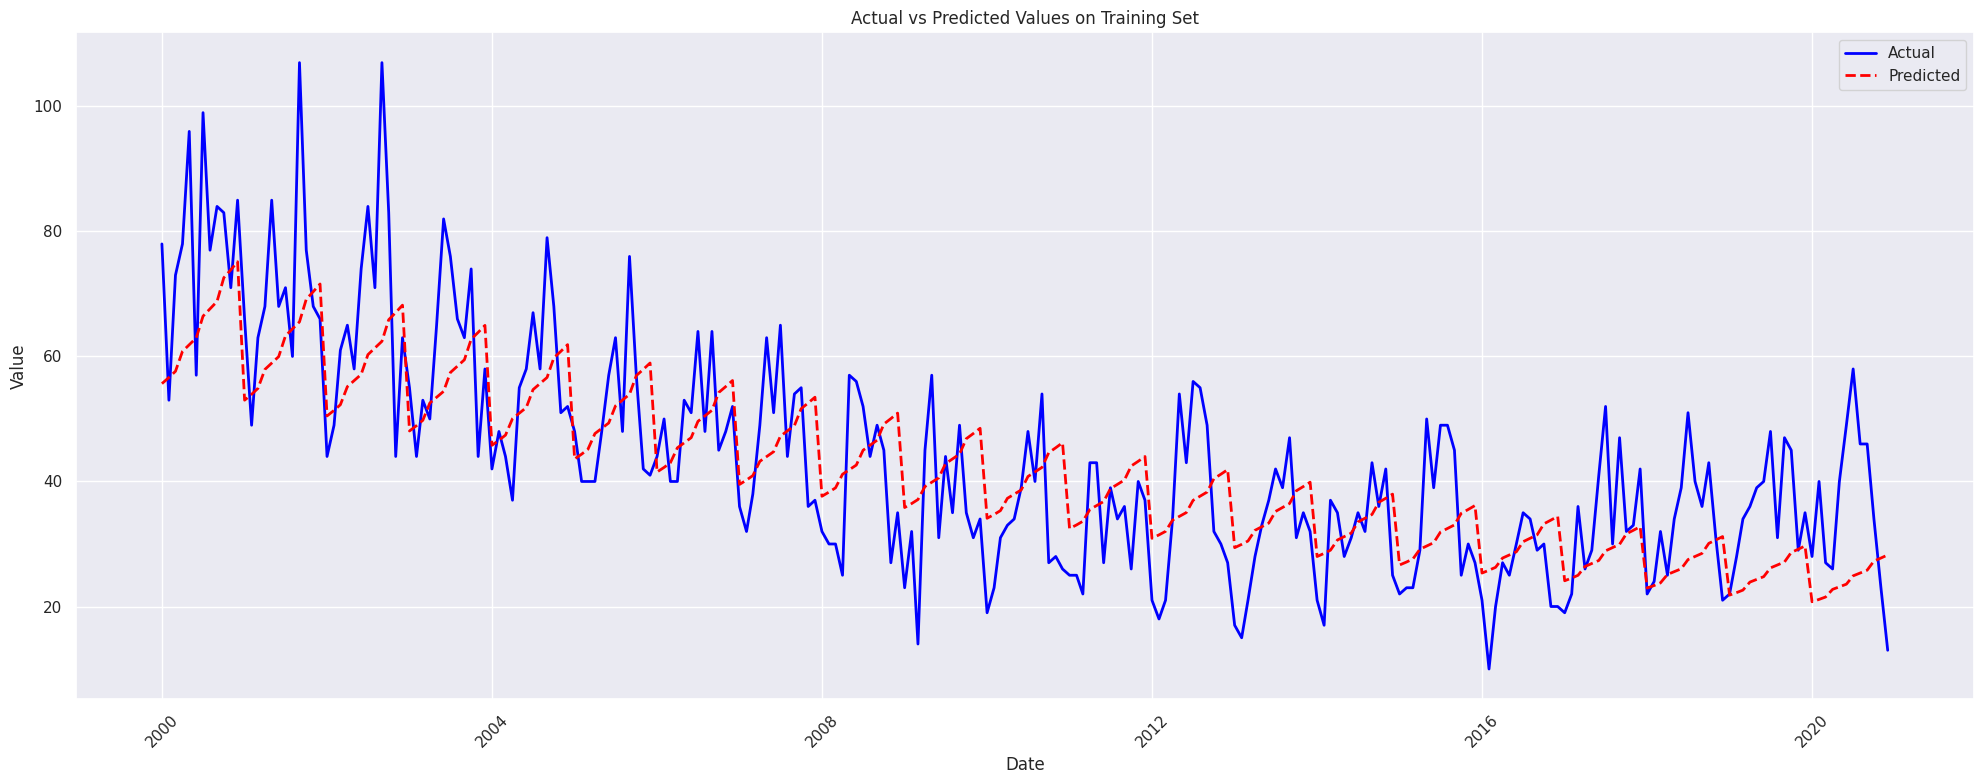

In [93]:
plt.figure(figsize=(20, 8))
plt.plot(df_train.index, y_org[:,0], label='Actual', color='blue', linewidth=2)
plt.plot(df_train.index, y_pred_org[:,0], label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Training Set')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
y_test = df_test['WERT'].values

In [95]:
X_test = df_test[['YEAR', 'MONTH', 'Quarter']].values

In [96]:
y_pred_test = ridge.predict(X_test)

In [97]:
y_pred_test_org= np.expm1(y_pred_test)

In [98]:
y_pred_test_org

array([[19.74355558],
       [20.10171332],
       [20.466055  ],
       [21.63348356],
       [22.02427275],
       [22.4218093 ],
       [23.69560129],
       [24.12199496],
       [24.55575073],
       [25.94559684],
       [26.41083888],
       [26.88411377]])

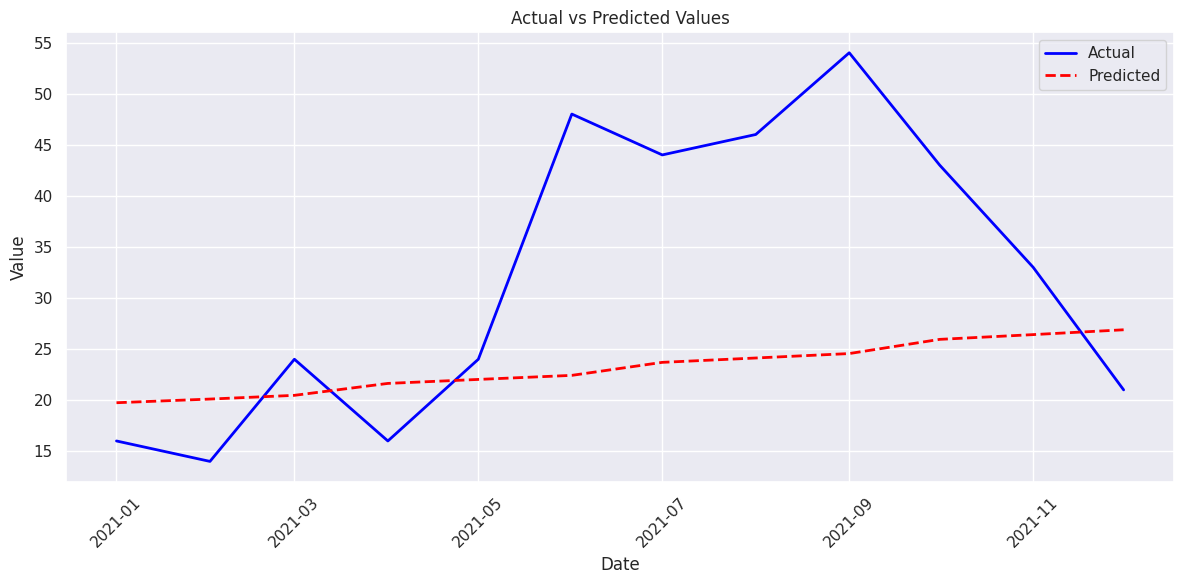

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(df_test.index, y_pred_test_org, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
columns= ['year', 'month','quarter']

Text(0.5, 1.0, 'Ridge Coefficients')

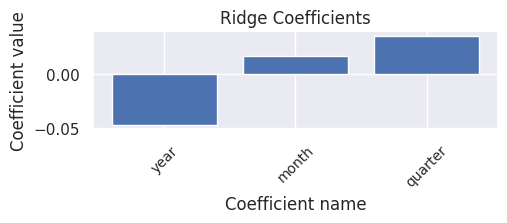

In [101]:
plt.figure(figsize=(5,2))
plt.bar(columns, ridge.coef_.flatten())
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.xlabel('Coefficient name')
plt.ylabel('Coefficient value')
plt.title('Ridge Coefficients')

In [102]:
import xgboost as xgb
from xgboost import XGBRegressor

In [103]:
gb = XGBRegressor(n_estimators=15, learning_rate=0.1, objective='reg:squarederror')

In [104]:
tscv= TimeSeriesSplit(n_splits=20)

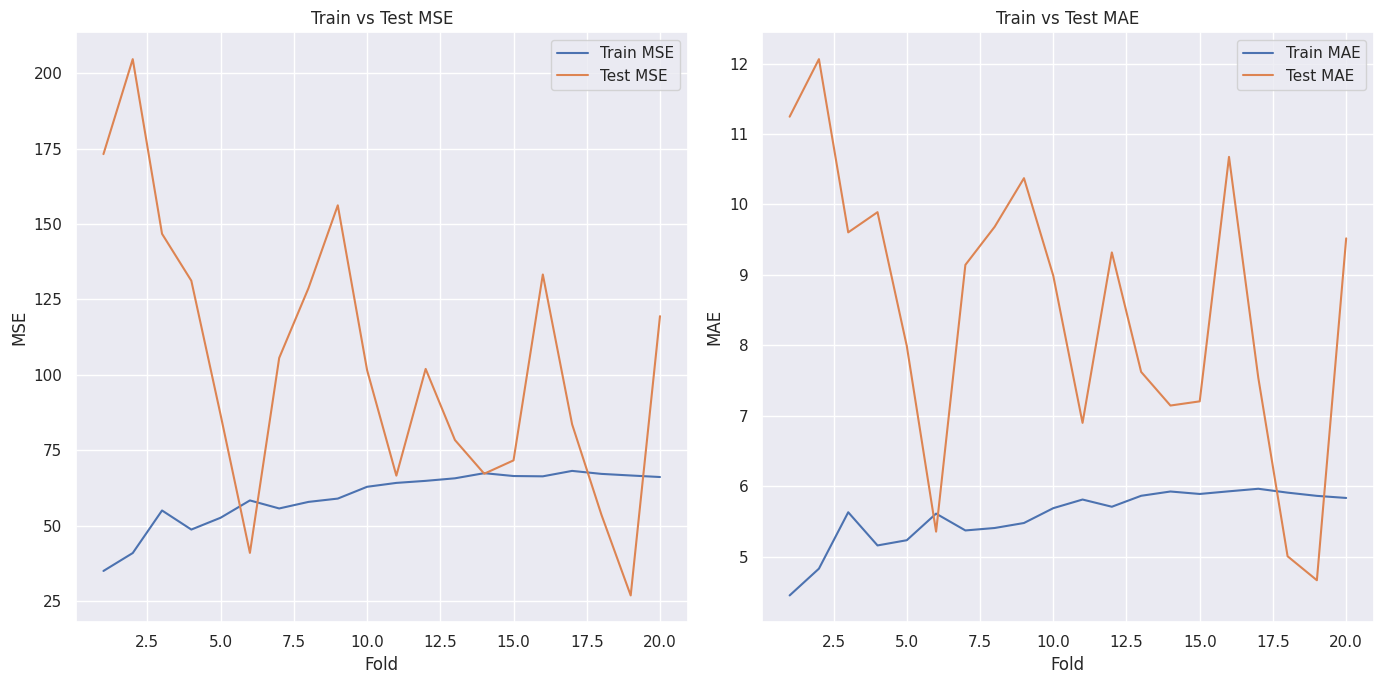

In [105]:
train_mse_scores = []
test_mse_scores = []
train_mae_scores = []
test_mae_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gb.fit(X_train, y_train)

    y_train_pred = gb.predict(X_train)
    y_test_pred = gb.predict(X_test)
    y_train_pred_org = np.expm1(y_train_pred)
    y_test_pred_org = np.expm1(y_test_pred)
    y_train_org = np.expm1(y_train)
    y_test_org = np.expm1(y_test)

    train_mse = mean_squared_error(y_train_org, y_train_pred_org)
    test_mse = mean_squared_error(y_test_org, y_test_pred_org)
    train_mae = mean_absolute_error(y_train_org, y_train_pred_org)
    test_mae = mean_absolute_error(y_test_org, y_test_pred_org)

    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)
    train_mae_scores.append(train_mae)
    test_mae_scores.append(test_mae)


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_mse_scores) + 1), train_mse_scores, label='Train MSE')
plt.plot(range(1, len(test_mse_scores) + 1), test_mse_scores, label='Test MSE')
plt.title('Train vs Test MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_mae_scores) + 1), train_mae_scores, label='Train MAE')
plt.plot(range(1, len(test_mae_scores) + 1), test_mae_scores, label='Test MAE')
plt.title('Train vs Test MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [106]:
np.mean(test_mse_scores)

103.8994087803517

In [107]:
np.mean(test_mae_scores)

8.496574497222902

In [108]:
y_test = df_test['WERT'].values

In [109]:
X_test = df_test[['YEAR', 'MONTH', 'Quarter']].values

In [110]:
y_pred_test = gb.predict(X_test)

In [111]:
y_pred_test_org= np.expm1(y_pred_test)

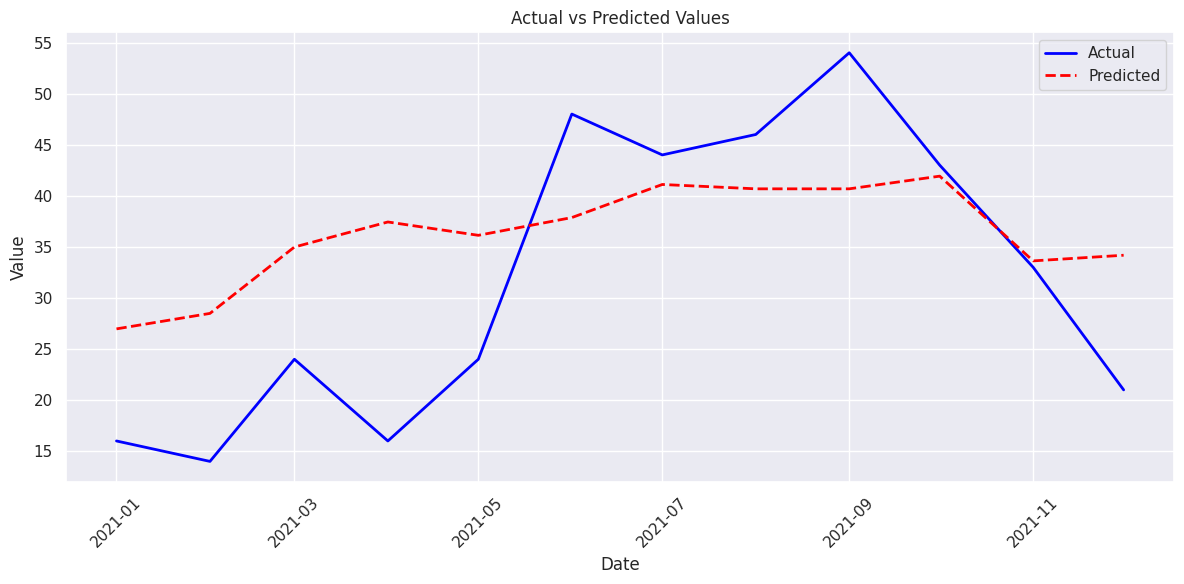

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, y_test, label='Actual', color='blue', linewidth=2)
plt.plot(df_test.index, y_pred_test_org, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [113]:
def make_predictions(year, month, model = gb):
  date = pd.to_datetime(year,month,1)
  quarter= date.quarter
  y_pred =gb.predict(year,month,quarter)
  y_pred_org= np.exmp1(y_pred)
  return y_pred_org


In [114]:
import numpy as np
import pandas as pd

def make_predictions(year, month, gb=gb):
    data = {'YEAR': [year], 'MONTH': [month]}
    df = pd.DataFrame(data)
    df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
    df['QUARTER'] = df['DATE'].dt.quarter

    features = df[['YEAR', 'MONTH', 'QUARTER']]

    y_pred = gb.predict(features)

    y_pred_org = np.expm1(y_pred)

    return {"prediction": np.round(y_pred_org[0], 1)}


In [115]:
make_predictions(2021,1)

{'prediction': 27.0}